In [20]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [21]:
# Load Dataset
path = "Dataset.csv"
df=pd.read_csv(path)

In [22]:
# Select Relevant information    
df = df[['Engine size (L)', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
df

,Engine size (L),Combined (L/100 km),CO2 emissions (g/km)
0,2.0,8.3,191
1,2.4,9.3,214
2,1.5,6.1,140
3,3.5,11.1,255
4,3.5,10.6,244
...,...,...,...
10081,2.0,8.9,207
10082,2.0,9.5,223
10083,2.0,9.0,210
10084,2.0,9.6,226


In [23]:
# Define the independent variables (features) and the dependent variable (target)
X = df[['Engine size (L)', 'Combined (L/100 km)']]
y = df['CO2 emissions (g/km)']

In [24]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 356.25744047319546
R² Score: 0.9077521824032669


Coefficients: [ 8.47688765 17.049924  ]
Intercept: 39.831615233639184


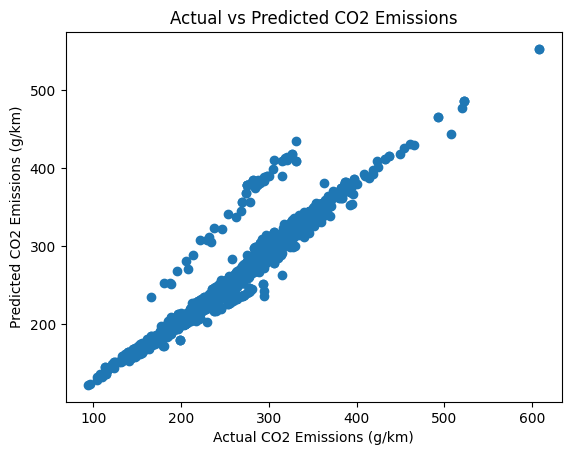

In [27]:
# Coefficients and intercept of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Visualizing the relationship between predicted and actual CO2 emissions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

Mean Squared Error: 356.25744047319546
R² Score: 0.9077521824032669
Coefficients (Engine size, Combined fuel consumption): [ 8.47688765 17.049924  ]
Intercept: 39.831615233639184


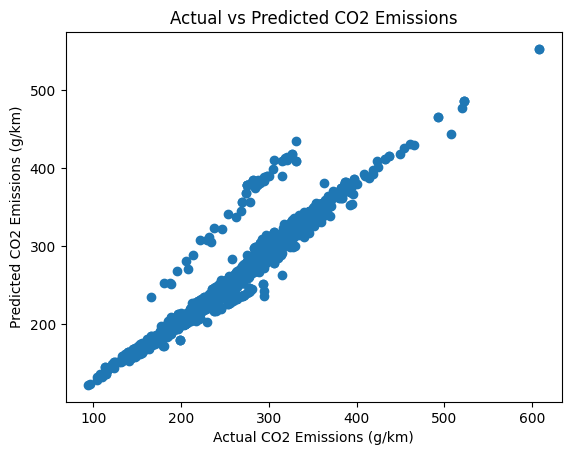

Cross-Validation R² Scores: [0.82209298 0.8697953  0.90538731 0.93472724 0.93412242]
Mean R² Score: 0.8932250512623423


In [28]:
# Evaluate the model performance on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Print the coefficients and intercept
print(f"Coefficients (Engine size, Combined fuel consumption): {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Visualise the relationship between actual and predicted CO2 emissions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute average R² score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R² Score: {scores.mean()}")


In [29]:
# Compute the R² score
r2 = r2_score(y_test, y_pred)

# Accuracy Percentage
accuracy_percentage = r2 * 100

print(f"Model Accuracy (based on R² score): {accuracy_percentage:.2f}%")


Model Accuracy (based on R² score): 90.78%


In [37]:
def predict_co2_emission(engine_size, fuel_consumption):
    
    input_data = pd.DataFrame({
        'Engine size (L)': [engine_size],
        'Combined (L/100 km)': [fuel_consumption]
    })
    
    
    predicted_co2 = model.predict(input_data)
    
    return predicted_co2[0]

engine_size = float(input("Enter the Engine size (L): "))
fuel_consumption = float(input("Enter the Combined fuel consumption (L/100 km): "))

predicted_emission = predict_co2_emission(engine_size, fuel_consumption)
print(f"Predicted CO2 Emissions (g/km): {predicted_emission:.2f}")


Predicted CO2 Emissions (g/km): 389.89
